In [1]:
import pandas as pd
import matplotlib.pyplot as plt

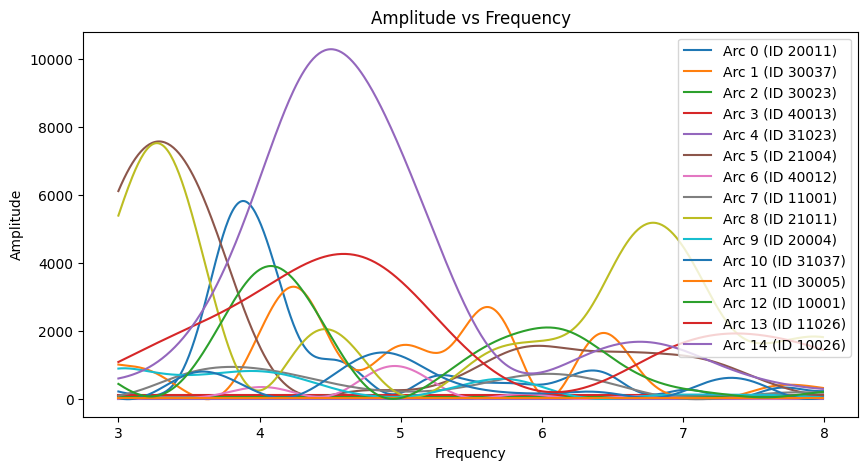

In [113]:
# Load the CSV files
arc_df = pd.read_csv('arc_freqs.csv')

# arc_df = arc_df[arc_df['num'] >= 500]
# arc_df = arc_df[arc_df['amplitude'] >= 100]
#arc_df = arc_df[arc_df['id'].astype(str).str.startswith('10')]

# col 0 = id, col 1 = frequency, col 2 = amplitude
plt.figure(figsize=(10, 5))
for arc in arc_df['i'].unique():
    arc_data = arc_df[arc_df['i'] == arc]
    plt.plot(arc_data['frequency'], arc_data['amplitude'], label=f'Arc {arc} (ID {arc_data['id'].values[0]})')

plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Amplitude vs Frequency')
plt.legend()
plt.show()

In [111]:
# Find the frequency with the highest amplitude per id
idx = arc_df.groupby('i')['amplitude'].idxmax()
max_amp_freqs = arc_df.loc[idx, ['i','id', 'frequency', 'amplitude','num']]


# Remove outliers from the frequencies using the IQR method
Q1 = max_amp_freqs['frequency'].quantile(0.25)
Q3 = max_amp_freqs['frequency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(max_amp_freqs)
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
max_amp_freqs = max_amp_freqs[(max_amp_freqs['frequency'] >= lower_bound) & (max_amp_freqs['frequency'] <= upper_bound)]
n_outliers = arc_df['i'].nunique() - max_amp_freqs['i'].nunique()
print(f"Removed {n_outliers} outliers")

# Calculate average and standard deviation of these frequencies
avg_freq = max_amp_freqs['frequency'].mean()
std_freq = max_amp_freqs['frequency'].std()

print(f"\nAverage frequency: {avg_freq:.4f}")
print(f"Standard deviation: {std_freq:.4f}")

       i     id  frequency     amplitude   num
88     0  20011       3.88   5819.510950  1733
624    1  30037       4.24   3303.132618  1867
1297   2  30023       5.97     81.256391    55
1506   3  40013       3.06    122.747417    85
2481   4  31023       7.81      0.930054    55
2529   5  21004       3.29   7568.045591  1405
3196   6  40012       4.96    975.847557  1295
3580   7  11001       3.80    949.645269   744
4027   8  21011       3.27   7518.677892  1744
4504   9  20004       3.04    908.698024  1398
5187  10  31037       4.87   1372.339639  1867
5500  11  30005       3.00     43.692201  1866
6108  12  10001       4.08   3910.934193   744
6660  13  11026       4.60   4266.163371  1745
7151  14  10026       4.51  10275.848170  1746
Lower bound: 1.0975000000000406, Upper bound: 6.917499999999917
Removed 1 outliers

Average frequency: 4.0407
Standard deviation: 0.8822


In [49]:
# DATA
n_obs = arc_df['i'].nunique()
mean_all = arc_df['frequency'].mean()
std_all = arc_df['frequency'].std()
outliers = n_outliers
mean_cleaned = avg_freq
std_cleaned = std_freq

print(f"{n_obs},{mean_all:.4f},{std_all:.4f},{outliers},{mean_cleaned:.4f},{std_cleaned:.4f}")

32,11.4950,3.7528,6,10.9573,0.2465


In [114]:
records = pd.read_csv('records.csv', header=1, names=["id", "time", "network", "band", "elevation", "azimuth", "snr"])


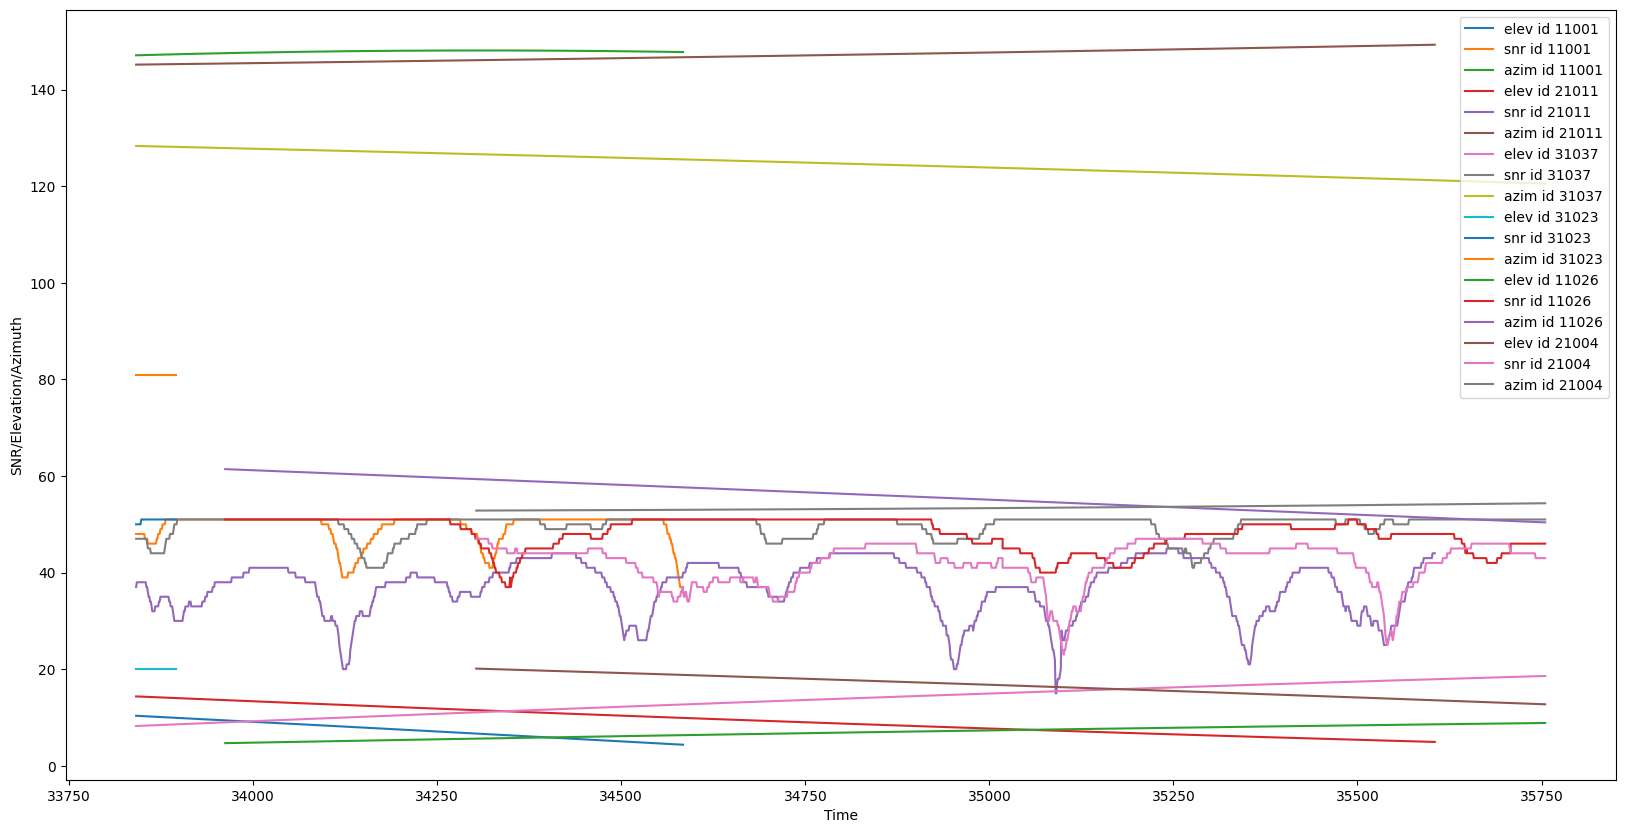

In [119]:
plt.figure(figsize=(20, 10))
for id_val in records['id'].unique():
    # if id_val != 30037 and id_val != 31037:
    #     continue
    if str(id_val)[:2] not in ["11", "21", "31", "41", "51", "61", "71", "81", "91"]:
        continue
    id_data = records[records['id'] == id_val]
    plt.plot(id_data['time'], id_data['elevation'], label=f'elev id {id_val}')
    plt.plot(id_data['time'], id_data['snr'], label=f'snr id {id_val}')
    plt.plot(id_data['time'], id_data['azimuth'], label=f'azim id {id_val}')

    # break # Remove this line to plot all ids

plt.xlabel('Time')
plt.ylabel('SNR/Elevation/Azimuth')
plt.legend()
plt.show()

In [26]:
import re

with open('../data/nmea5.log', 'r', encoding='utf-8', errors='ignore') as infile:
    lines = infile.readlines()

pattern = re.compile(r'^\$.*\*[A-Za-z0-9]{2}$')
filtered_lines = [line for line in lines if pattern.match(line.strip())]

with open('../data/nmea5.txt', 'w') as outfile:
    outfile.writelines(filtered_lines)